In [1]:
# @title Default title text
# Install libraries if needed
!pip install scikit-learn pandas matplotlib seaborn


In [2]:
# @title Default title text
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# @title Default title text

import pandas as pd

# Replace with your actual file path in Google Drive
file_path = '/content/drive/MyDrive/MLTask1/german.data'  # dataset path

# Define column names based on the dataset description
column_names = ['Checking Status', 'Duration', 'Credit History', 'Purpose', 'Credit Amount',
                'Savings Account/Bonds', 'Employment Since', 'Installment Rate', 'Personal Status and Sex',
                'Other Debtors/Guarantors', 'Residence Since', 'Property', 'Age',
                'Other Installment Plans', 'Housing', 'Number of Existing Credits', 'Job',
                'Number of People Providing Maintenance for', 'Telephone', 'Foreign Worker', 'Credit Risk']

# Load the dataset, specifying the separator and column names
df = pd.read_csv(file_path, sep=' ', names=column_names)

# Preview data
display(df.head())

,Checking Status,Duration,Credit History,Purpose,Credit Amount,Savings Account/Bonds,Employment Since,Installment Rate,Personal Status and Sex,Other Debtors/Guarantors,...,Property,Age,Other Installment Plans,Housing,Number of Existing Credits,Job,Number of People Providing Maintenance for,Telephone,Foreign Worker,Credit Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [11]:
# @title Default title text
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming the last column is the target variable ('Credit Risk')
X = df.drop('Credit Risk', axis=1)
y = df['Credit Risk']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

ValueError: could not convert string to float: 'A11'

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.89      0.86       141
           2       0.68      0.54      0.60        59

    accuracy                           0.79       200
   macro avg       0.75      0.72      0.73       200
weighted avg       0.78      0.79      0.78       200


ROC-AUC Score:
0.8123572544777017


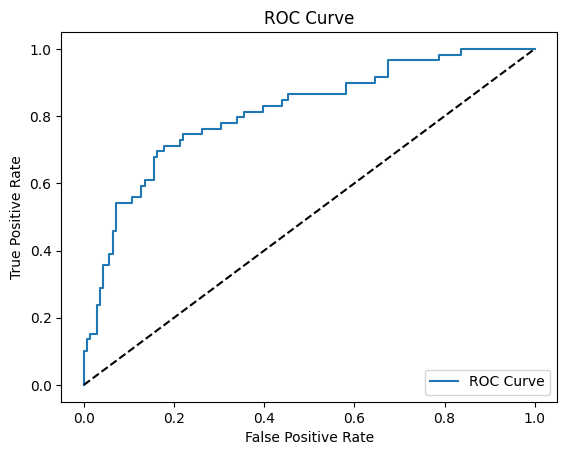

In [12]:
# @title Logistic Regression Model Training and Evaluation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the last column is the target variable ('Credit Risk')
X = df.drop('Credit Risk', axis=1)
y = df['Credit Risk']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions and predict probabilities
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_pred_prob))

# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label=2) # Specify pos_label if your positive class is not 1
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--') # Plot the diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()